# Zahra khatibi - 610398119 - HW2
## Solve N Queens with Memetic Algorithm

### solve the problem for n=100

In [12]:
n = 100

### make our generation with population 25 of random  permutation arrays of numbers 0 to n.
### because queens can not be in the same row or column, hence consider permutationو which queen i in row i is on column p[i]

In [2]:
import more_itertools as mit
random_size = 25
def population(random_size):
    iterable = range(n)
    random_population = []
    for i in range(random_size): 
        random_population.append(tuple(mit.random_permutation(iterable)))
    return random_population

### here is definition of fitness function where calculate the number of queens which limited by other queens

In [3]:
def fitness(random_population):
    limited_queens = []
    limited_number = 0
    for cro in random_population:
        for i in range(n):
            x = cro[i]
            for j in range(1,n-i):
                y = cro[i+j]
                if(abs(x-y)==j):
                    limited_number+=1
        limited_queens.append(limited_number)
        limited_number = 0
    return limited_queens    

### now we sort society based on fitness function

In [4]:
def sort_fitness(random_population, limited_queens):
    dt = list(zip(random_population, limited_queens))
    res = sorted(dt, key = lambda x: x[1])
    dt = list(zip(*res))
    random_population = dt[0]
    return random_population

## after sorting,  we choose parents from our society. the parameter for choosing parents is 0.6. it means 60% of the  chromosomes selected as parents. this value tested many times and set since it has the best result among other parameters.
### 50% of parent chromosomes selected from the best chromosomes.
### 25% of parents selected from second 25% of society.
### 15% of parents selected from third 25% of society.
### 10% of parents selected from last 25% of society.
### we select best sample on each level and replace them with parents

In [5]:
import random
def choose_parents(random_population):
    global p
    p = 0.6
    len_pop = len(random_population)
    global parents_size
    parents_size = int(p * random_size)
    parents_sample = []
    random_population = list(random_population)
    parents_sample +=random.sample(random_population[0:1],1)
    parents_sample += random.sample(random_population[0:len_pop//2],int(parents_size*50/100))
    parents_sample += random.sample(random_population[len_pop//4:len_pop//2],int(parents_size*25/100))
    parents_sample += random.sample(random_population[len_pop//2:3*len_pop//4],int(parents_size*15/100))
    parents_sample += random.sample(random_population[3*len_pop//4:len_pop],int(parents_size*10/100)-1)   
    return parents_sample


## after chromosomes selecting we start producing children with order recombination method
### next, make parents of 0.8 parents population. since 0.8 selected as the best parameter for this section.
### first choose 2 sample out of parents as father and mother.
### next choose 2 random number and transfer all numbers between them to child. then fill other number of child with mother

In [16]:
from random import randint
def choose_children(parents_sample):
    global c 
    c = 0.8
    global child_size 
    child_size = int(c * len(parents_sample))
    children = []
    for i in range(child_size):
        random_child = random.sample(parents_sample,2)
        mother = random_child[1]
        father = random_child[0]
        child = [0 for _ in range(n)]
        f_number = randint(0, n-1)
        s_number = randint(0, n-1)
        s = min(f_number,s_number)
        e = max(f_number,s_number)
        child[s:e] = father[s:e]
        index_m = e
        index_c = e
        while(child.count(0)>1):
            if(mother[index_m] not in child):
                child[index_c] = mother[index_m]
                index_m = (index_m+1)%n
                index_c = (index_c+1)%n
            else:
                index_m = (index_m+1)%n
        children.append(child)
    return children

### here is definition of local search, first  choose 2 random number and swap the numbers of that index
### the simpler the adjacency definition is, the faster the program we have

In [7]:
from random import randint
def local_search(children):
    for i in range(0,child_size,2):
        neighbors = []
        for j in range(100):
            Neighbor = children[i].copy()
            X = randint(0, n-1)
            Y = randint(0, n-1)
            neighbor[Y], neighbor[X]= neighbor[X], neighbor[Y]
            mut.append(neighbor)
        fitness_mutation = fitness(mut)
        sort_mutation = sort_fitness(mut,fitness_mutation)
        children[i] = sort_mutation[0]
    return children

### now mutate 10% of children such that first select 2 random number and shuffle the numbers of between these 2 number
### the mutation in this problem is more important than the TSP problem as we have local search in our algorithm that cause fast convergence. so after local search we apply mutation to prevent fast convergence.
### i also run code many times with less mutation rate but the convergence happend so quickly. so i increase the mutation rate and get better result by the cause of genetic diversity.

In [8]:
import numpy as np
def mutation(children):
    for i in range(0,len(children),10):
        X,Y = np.random.choice(list(range(n)),2,replace=False)
        if(X>Y): 
            X,Y = Y,X     
        children[i][X:Y]=np.random.choice(children[i][X:Y],Y-X,replace=False)
    return children

## after children mutation we should upgrade our first generation. from tail of our array (which has the worst fitnesses) we split by the number of children and replace them 

In [9]:
 def update_population(random_population,children):
    len_c = len(children)
    len_p = len(random_population)
    children_fitness = fitness(children)
    children = sort_fitness(children,children_fitness)
    random_population = list(random_population)
    random_population[len_p-len_c:len_p] = list(children)
    random_population = tuple(random_population)
    return random_population

## now we run our program, and continue find solution.
## find solution when min of fitness Equal to zero

In [14]:
pop = population(random_size)
min_fitness = [1234567890]
mean_fitness = []
counter = 0
while(min(min_fitness)!=0):
    fit_queen = fitness(pop)
    pop = sort_fitness(pop,fit_queen)
    parent = choose_parents(pop)
    children = choose_children(parent)
    children = local_search(children)
    children = mutation(children)
    new_pop = update_population(pop,children)
    new_fit_queen = fitness(new_pop)
    pop = new_pop
    min_fitness.append(min(new_fit_queen))
    mean_fitness.append(int(sum(new_fit_queen)/len(new_fit_queen)))
    #print(counter,": ",min(new_fit_queen),int(sum(new_fit_queen)/len(new_fit_queen)))
    counter+=1
    

Solution:  [11, 34, 26, 5, 80, 86, 45, 60, 18, 10, 54, 97, 61, 16, 44, 33, 83, 53, 77, 92, 12, 66, 41, 65, 93, 2, 35, 27, 74, 99, 71, 79, 6, 20, 47, 89, 64, 88, 3, 55, 31, 21, 37, 63, 8, 52, 32, 22, 38, 1, 84, 24, 95, 7, 39, 43, 0, 56, 85, 17, 23, 96, 4, 42, 90, 36, 19, 15, 91, 98, 82, 68, 40, 57, 70, 73, 14, 94, 59, 72, 9, 51, 76, 87, 62, 30, 75, 49, 28, 25, 50, 13, 58, 48, 29, 78, 46, 69, 67, 81]


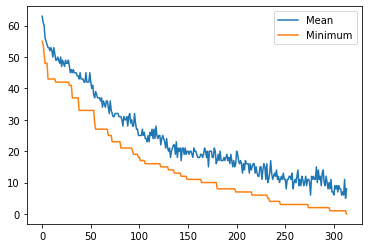

In [11]:
import pandas as pd
import matplotlib as plt
data_fram = pd.DataFrame({'Mean':mean_fitness, 'Minimum':min_fitness[1::]})
data_fram.plot()
print("Solution: ", pop[0])

## visualizing

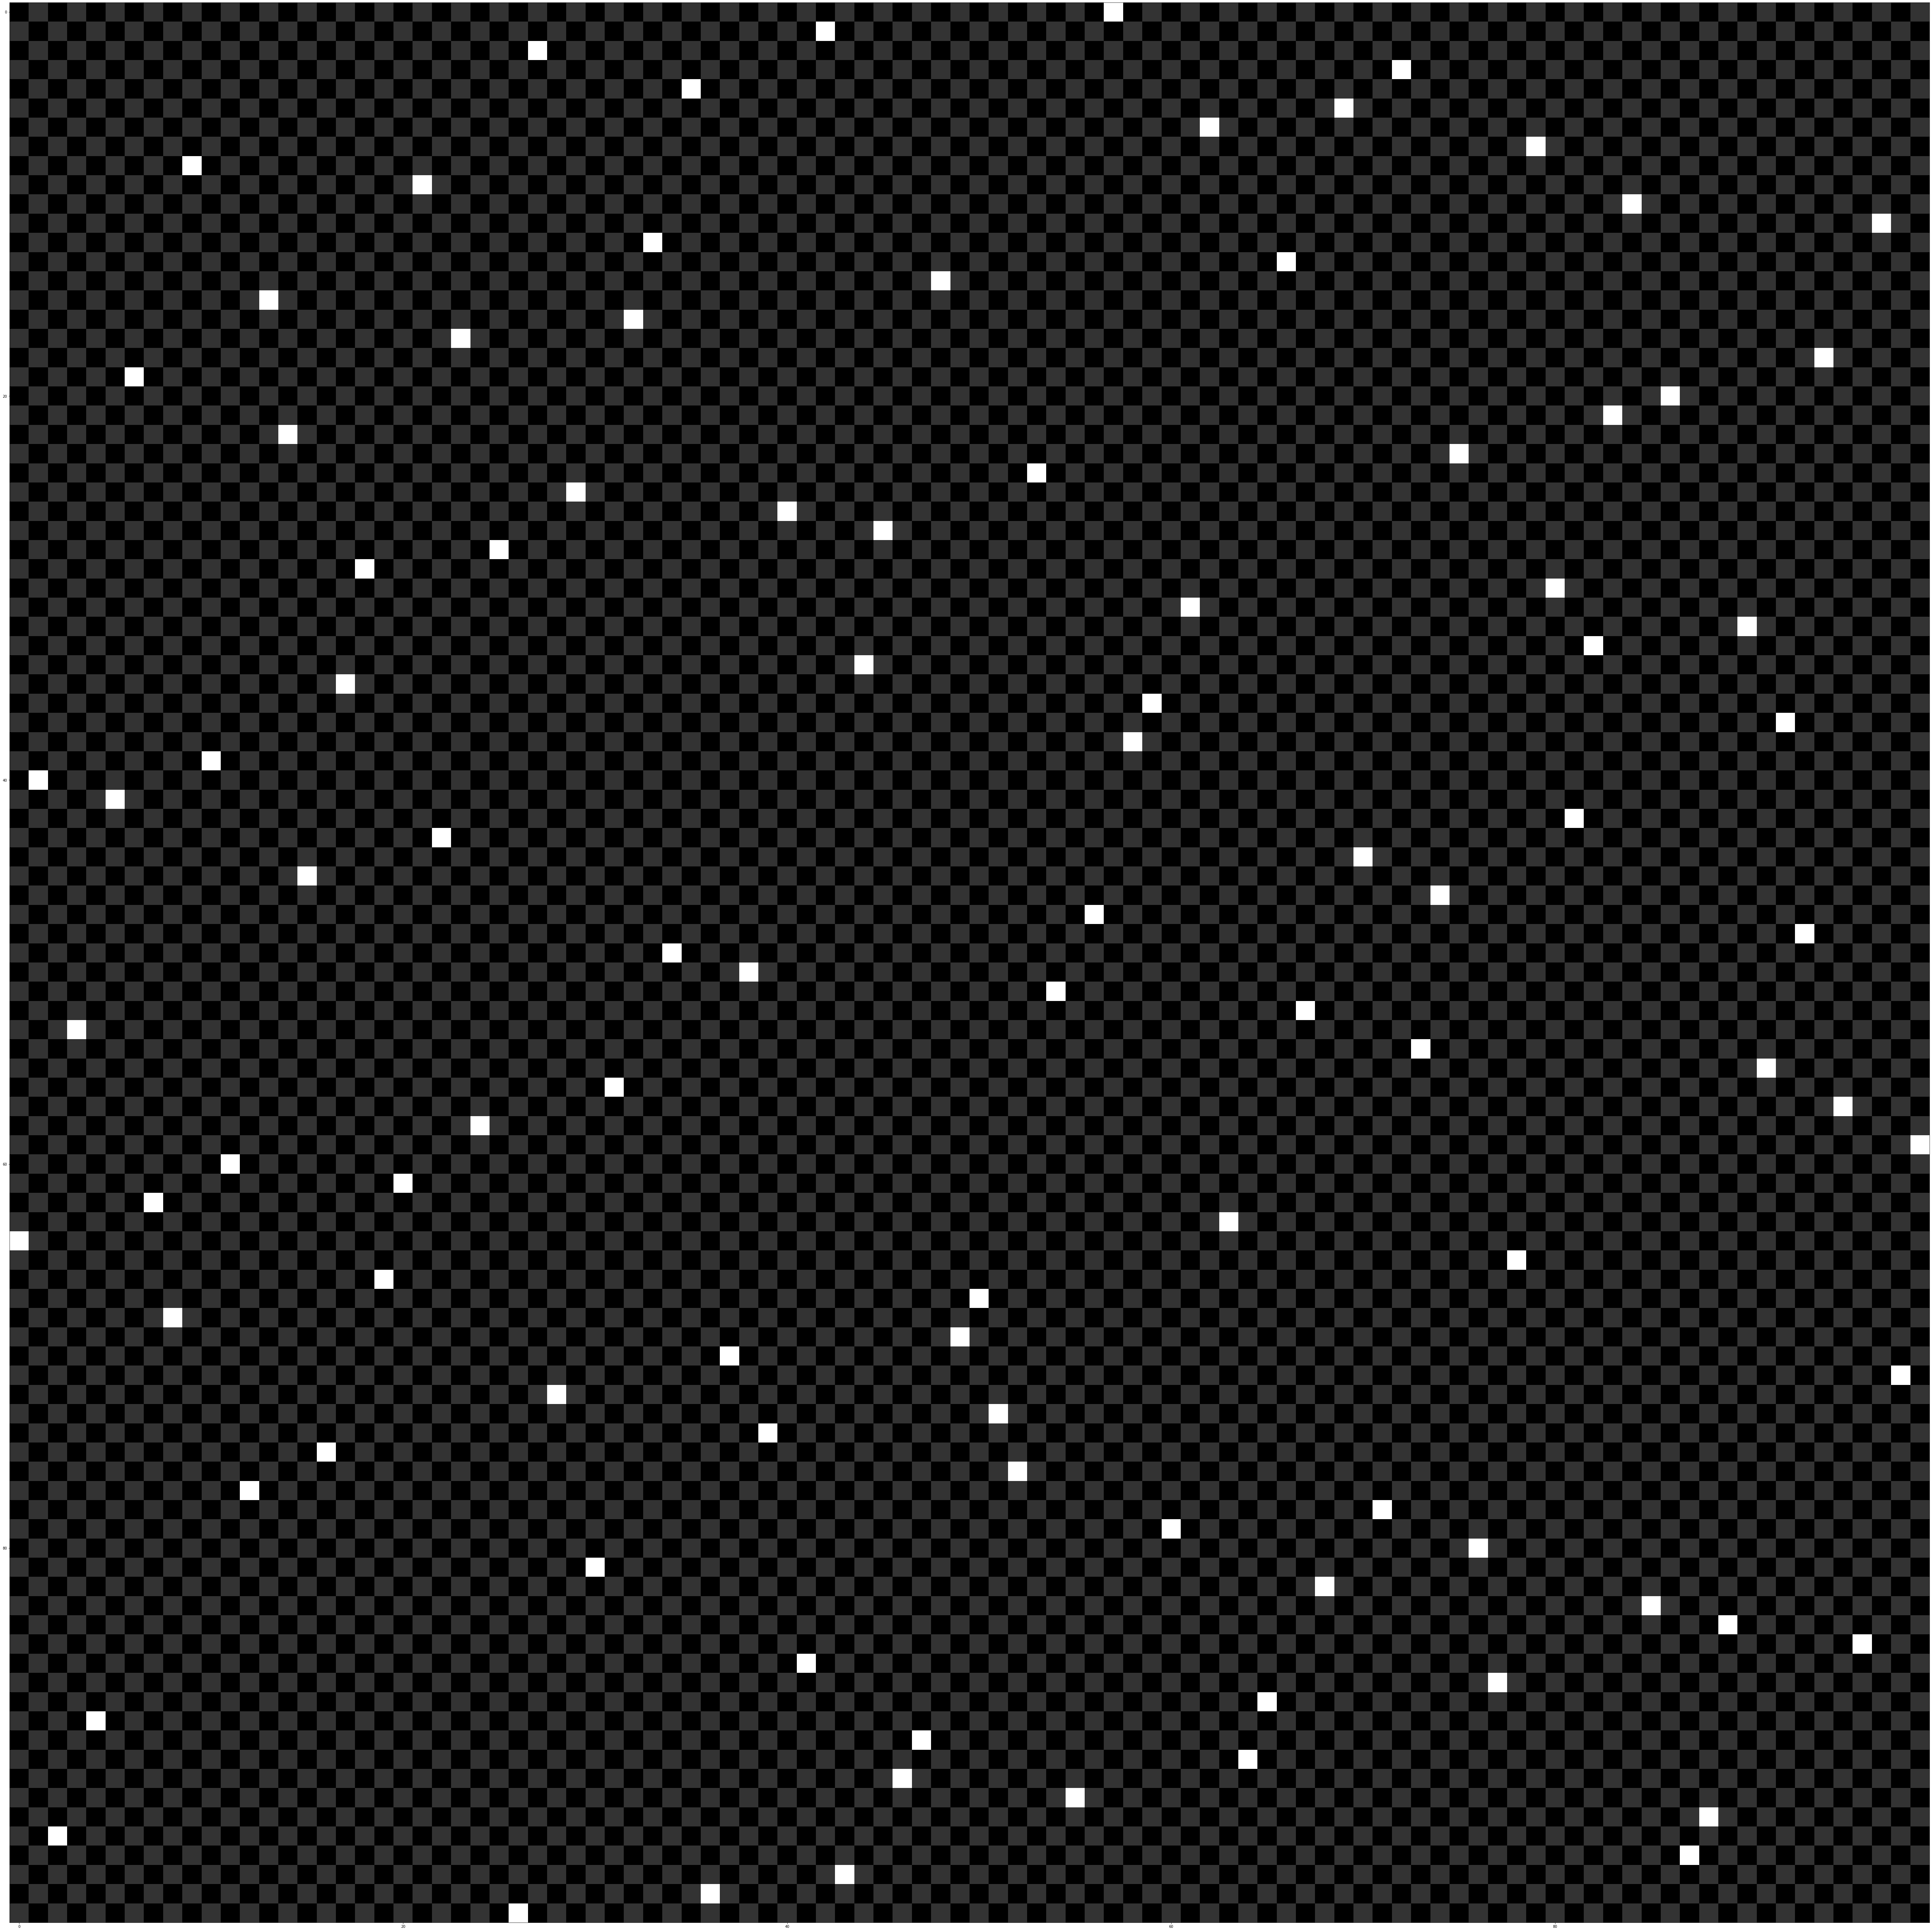

In [32]:
table = [[(j+i)%2 for j in range(n)]for i in range(n)]
for i in range(n):
    table[i][pop[0][i]]=5
plt.pyplot.figure(figsize=(n,n))
plt.pyplot.imshow(table,cmap='gray')